# Part I - Pisa Data Dataset Exploration
## by Chayma Miledi

## Table of Contents
<ul>
<li><a href="#intro">Intoduction</a></li>
<li><a href="#prewrangle">Preliminary Wrangling</a></li>
<li><a href="#wrangle">Data Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#ccl">Conclusions</a></li>
</ul>

<a id="intro"></a>
## Introduction

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

<a id="prewrangle"></a>
## Preliminary Wrangling

In [87]:
# import all packages and set plots to be embedded inline
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [88]:
# load dataset from zip file
df = pd.read_csv('pisa2012.csv.zip',compression='zip', encoding='latin-1', dtype='unicode')

In [89]:
df.shape

(485490, 636)

In [90]:
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00001,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00002,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00003,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00004,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00005,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


### What is the structure of your dataset?

The Dataset has 485490 rows (observations) and 636 columns (variables).

### What is/are the main feature(s) of interest in your dataset?

Features of interests:

* Scores: math, comptetions, reading ...
* Students phenotype: gender, age, region, immigrant, ...
* Country development: under-developed, developing, developed
* School background: at school, ICT, class size, ...
* Family background: wealth, possesion, siblings, parental education, divorce, ...
* Outside school: hobbies, friends, freetime, studytime, ...

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Selected features:

* CNT, IC10Q08, IC10Q09, ICTSCH, ST71Q01, FAMSTRUC, ST11Q03, ST11Q04, ST13Q01, ST17Q01, HISEI, PARED, ST27Q01, ST27Q02, ST27Q03, ST27Q05, ST28Q01, ST04Q01, AGE, IMMIG, LMINS, MMINS, SMINS, ST55Q01, ST55Q02, ST55Q03, ST55Q04, ST57Q01, IC08Q01, IC08Q02, IC08Q05, IC08Q06, TIMEINT, PV1MATH, PV1READ, PV1SCIE
* Average Math Score = PV1MATH + PV2MATH + PV3MATH + PV4MATH + PV5MATH / 5
* Average Reading Score = PV1READ + PV2READ + PV3READ + PV4READ + PV5READ / 5
* Average Science Score = PV1SCIE + PV2SCIE + PV3SCIE + PV4SCIE + PV5SCIE / 5

In [91]:
# Select the features of interest
df = df[['CNT', 'COBN_F', 'COBN_M', 'COBN_S', 'IC10Q08', 'IC10Q09', 'ICTSCH', 'ST71Q01', 'FAMSTRUC', 'ST11Q03', 'ST11Q04', 'ST13Q01', 'ST17Q01', 'HISEI', 'PARED', 'ST27Q01', 'ST27Q02', 'ST27Q03', 'ST27Q05', 'ST28Q01', 'ST04Q01', 'AGE', 'IMMIG', 'LMINS', 'MMINS', 'SMINS', 'ST55Q01', 'ST55Q02', 'ST55Q03', 'ST55Q04', 'ST57Q01', 'IC08Q01', 'IC08Q02', 'IC08Q05', 'IC08Q06', 'TIMEINT', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']]
df = df.rename({
    'CNT': 'country', 'COBN_F': 'birth_country_father', 'COBN_M' : 'birth_country_mother', 'COBN_S' : 'birth_country_student', 'IC10Q08': 'school_homework', 'IC10Q09': 'school_groupwork', 'ICTSCH': 'school_ict', 'ST71Q01': 'school_classes_per_week', 'FAMSTRUC': 'parent_numbers', 'ST11Q03': 'brothers', 'ST11Q04': 'sisters', 'ST13Q01': 'mother_schooling', 'ST17Q01': 'father_schooling', 'HISEI': 'parent_occupational', 'PARED': 'parent_education_years', 'ST27Q01': 'home_phones',
    'ST27Q02': 'home_televisions', 'ST27Q03': 'home_computers', 'ST27Q05': 'home_rooms', 'ST28Q01': 'home_books', 'ST04Q01': 'gender', 'AGE': 'age', 'IMMIG': 'immigrant', 'LMINS': 'language_minutes_per_week', 'MMINS': 'math_minutes_per_week', 'SMINS': 'science_minutes_per_week', 'ST55Q01': 'outofschool_language', 'ST55Q02': 'outofschool_math',
    'ST55Q03': 'outofschool_science', 'ST55Q04': 'outofschool_others', 'ST57Q01': 'outofschool_homework_hours', 'IC08Q01': 'outofschool_single_games', 'IC08Q02': 'outofschool_multi_games', 'IC08Q05': 'outofschool_social_networks', 'IC08Q06': 'outofschool_internet', 'TIMEINT': 'computer_use_minutes'}, axis='columns')

In [92]:
df.sample(5)

,country,birth_country_father,birth_country_mother,birth_country_student,school_homework,school_groupwork,school_ict,school_classes_per_week,parent_numbers,brothers,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
395241,Qatar,Another country (QAT),Another country (QAT),Another country (QAT),NaN,NaN,NaN,NaN,NaN,NaN,...,398.4682,422.5266,376.0138,433.7538,404.8838,359.4181,357.5532,443.342,384.5953,339.8359
450376,Chinese Taipei,Chinese Taipei,Chinese Taipei,Chinese Taipei,Once or twice a week,Never or hardly ever,1.1832,37,2,Yes,...,548.432,549.2339,591.737,550.0359,551.6398,525.401,539.3883,521.671,548.7132,526.3335
172675,Estonia,Another country (EST),Another country (EST),Another country (EST),Never or hardly ever,Once or twice a month,-1.0936,NaN,2,Yes,...,427.2581,391.9725,412.0211,371.9239,414.427,420.2163,425.8113,429.5412,465.9082,413.6889
215527,Croatia,Croatia,Croatia,Croatia,Once or twice a month,Once or twice a month,-0.0836,33,2,No,...,530.308,546.3469,551.1586,545.545,556.7722,618.9295,553.6554,550.8579,592.8198,567.6427
459781,Thailand,Thailand,Thailand,Thailand,NaN,NaN,NaN,32,2,No,...,579.4532,580.2475,575.4816,585.0133,577.8646,600.2797,586.2924,564.8452,537.8031,567.6427


In [93]:
df.shape

(485490, 51)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 51 columns):
country                        485490 non-null object
birth_country_father           481825 non-null object
birth_country_mother           481843 non-null object
birth_country_student          481836 non-null object
school_homework                290770 non-null object
school_groupwork               290815 non-null object
school_ict                     297995 non-null object
school_classes_per_week        255665 non-null object
parent_numbers                 429058 non-null object
brothers                       400076 non-null object
sisters                        390768 non-null object
mother_schooling               457979 non-null object
father_schooling               443261 non-null object
parent_occupational            450621 non-null object
parent_education_years         473091 non-null object
home_phones                    477079 non-null object
home_televisions         

<a id="wrangle"></a>
## Data Wrangling

In [95]:
df.isnull().sum()

country                             0
birth_country_father             3665
birth_country_mother             3647
birth_country_student            3654
school_homework                194720
school_groupwork               194675
school_ict                     187495
school_classes_per_week        229825
parent_numbers                  56432
brothers                        85414
sisters                         94722
mother_schooling                27511
father_schooling                42229
parent_occupational             34869
parent_education_years          12399
home_phones                      8411
home_televisions                 8942
home_computers                  12031
home_rooms                      15847
home_books                      11725
gender                              0
age                               116
immigrant                       13697
language_minutes_per_week      202624
math_minutes_per_week          202187
science_minutes_per_week       214576
outofschool_

In [96]:
# convert AGE to numeric
df["age"] = pd.to_numeric(df["age"])

In [97]:
# convert strings to numerical values

df["PV1MATH"] = pd.to_numeric(df["PV1MATH"],errors='coerce')
df["PV2MATH"] = pd.to_numeric(df["PV2MATH"],errors='coerce')
df["PV3MATH"] = pd.to_numeric(df["PV3MATH"],errors='coerce')
df["PV4MATH"] = pd.to_numeric(df["PV4MATH"],errors='coerce')
df["PV5MATH"] = pd.to_numeric(df["PV5MATH"],errors='coerce')

df["PV1READ"] = pd.to_numeric(df["PV1READ"],errors='coerce')
df["PV2READ"] = pd.to_numeric(df["PV2READ"],errors='coerce')
df["PV3READ"] = pd.to_numeric(df["PV3READ"],errors='coerce')
df["PV4READ"] = pd.to_numeric(df["PV4READ"],errors='coerce')
df["PV5READ"] = pd.to_numeric(df["PV5READ"],errors='coerce')

df["PV1SCIE"] = pd.to_numeric(df["PV1SCIE"],errors='coerce')
df["PV2SCIE"] = pd.to_numeric(df["PV2SCIE"],errors='coerce')
df["PV3SCIE"] = pd.to_numeric(df["PV3SCIE"],errors='coerce')
df["PV4SCIE"] = pd.to_numeric(df["PV4SCIE"],errors='coerce')
df["PV5SCIE"] = pd.to_numeric(df["PV5SCIE"],errors='coerce')

In [98]:
df["language_minutes_per_week"] = pd.to_numeric(df["language_minutes_per_week"],errors='coerce')
df["math_minutes_per_week"] = pd.to_numeric(df["math_minutes_per_week"],errors='coerce')
df["science_minutes_per_week"] = pd.to_numeric(df["science_minutes_per_week"],errors='coerce')
df["computer_use_minutes"] = pd.to_numeric(df["computer_use_minutes"],errors='coerce')

In [99]:
# replace NaN age values with the mean age
df.loc[np.isfinite(df['age']) == False, 'age'] = df['age'].mean()

In [100]:
# Replace NaN or 'Invalid' values for father/mother birth country to 'Missing'

df.loc[df['birth_country_father'].isna() == True, 'birth_country_father'] = 'Missing'
df.loc[df['birth_country_mother'].isna() == True, 'birth_country_mother'] = 'Missing'
df.loc[df['birth_country_student'].isna() == True, 'birth_country_student'] = 'Missing'

df.loc[df['birth_country_father'] == 'Invalid', 'birth_country_father'] = 'Missing'
df.loc[df['birth_country_mother'] == 'Invalid', 'birth_country_mother'] = 'Missing'
df.loc[df['birth_country_student'] == 'Invalid', 'birth_country_student'] = 'Missing'

In [101]:
df.isnull().sum()

country                             0
birth_country_father                0
birth_country_mother                0
birth_country_student               0
school_homework                194720
school_groupwork               194675
school_ict                     187495
school_classes_per_week        229825
parent_numbers                  56432
brothers                        85414
sisters                         94722
mother_schooling                27511
father_schooling                42229
parent_occupational             34869
parent_education_years          12399
home_phones                      8411
home_televisions                 8942
home_computers                  12031
home_rooms                      15847
home_books                      11725
gender                              0
age                                 0
immigrant                       13697
language_minutes_per_week      202624
math_minutes_per_week          202187
science_minutes_per_week       214576
outofschool_

In [102]:
# compute the average scores

df['math_score'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH']) / 5
df['reading_score'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ']) / 5
df['science_score'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE']) / 5


In [103]:
# comute overall score
df['overall_score'] = (df['math_score'] + df['reading_score'] + df['science_score']) / 3

In [104]:
# drop unuseful columns

df.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
                   'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE',], inplace = True)

In [105]:
df.head()

,country,birth_country_father,birth_country_mother,birth_country_student,school_homework,school_groupwork,school_ict,school_classes_per_week,parent_numbers,brothers,...,outofschool_homework_hours,outofschool_single_games,outofschool_multi_games,outofschool_social_networks,outofschool_internet,computer_use_minutes,math_score,reading_score,science_score,overall_score
0,Albania,Albania,Albania,Albania,NaN,NaN,NaN,NaN,2,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,366.18634,261.01424,371.91348,333.038020
1,Albania,Albania,Albania,Albania,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,470.56396,384.68832,478.12382,444.458700
2,Albania,Albania,Albania,Albania,NaN,NaN,NaN,24,2,No,...,NaN,NaN,NaN,NaN,NaN,NaN,505.53824,405.18154,486.60946,465.776413
3,Albania,Albania,Albania,Albania,NaN,NaN,NaN,NaN,2,No,...,10,NaN,NaN,NaN,NaN,NaN,449.45476,477.46376,453.97240,460.296973
4,Albania,Albania,Albania,Albania,NaN,NaN,NaN,NaN,2,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,385.50398,256.01010,367.15778,336.223953


In [106]:
# determine whether a student has homogenous or heterogenous family background

df['cultural_background'] = (df['birth_country_father'] == df['birth_country_mother'])

In [107]:
df.loc[df['cultural_background'] == True, 'cultural_background'] = 'Same'
df.loc[df['cultural_background'] == False, 'cultural_background'] = 'Different'

In [108]:
df.sample(5)

,country,birth_country_father,birth_country_mother,birth_country_student,school_homework,school_groupwork,school_ict,school_classes_per_week,parent_numbers,brothers,...,outofschool_single_games,outofschool_multi_games,outofschool_social_networks,outofschool_internet,computer_use_minutes,math_score,reading_score,science_score,overall_score,cultural_background
480994,Vietnam,Viet Nam,Viet Nam,Viet Nam,NaN,NaN,NaN,26,1,Yes,...,NaN,NaN,NaN,NaN,NaN,525.94640,510.90420,550.11190,528.987500,Same
26392,Australia,Australia,Australia,Australia,Once or twice a month,Never or hardly ever,-0.0836,39,2,Yes,...,Never or hardly ever,Never or hardly ever,Every day,Once or twice a week,58.0,447.42950,470.71212,507.31072,475.150780,Same
237565,Israel,Israel,Israel,Israel,Almost every day,Every day,0.5423,NaN,NaN,NaN,...,Never or hardly ever,Once or twice a week,Every day,Every day,137.0,309.79126,455.54080,395.31892,386.883660,Same
307692,Latvia,Missing,Missing,Missing,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,356.99486,296.30044,243.13688,298.810727,Same
112636,Chile,Chile,Chile,Chile,Once or twice a week,Once or twice a week,-1.0936,NaN,1,No,...,Never or hardly ever,Never or hardly ever,Almost every day,Almost every day,28.0,390.56706,482.78562,473.08840,448.813693,Same


In [109]:
df.country.value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
Australia                   14481
United Kingdom              12659
United Arab Emirates        11500
Switzerland                 11229
Qatar                       10966
Colombia                     9073
Finland                      8829
Belgium                      8597
Denmark                      7481
Jordan                       7038
Chile                        6856
Thailand                     6606
Japan                        6351
Chinese Taipei               6046
Peru                         6035
Slovenia                     5911
Argentina                    5908
Kazakhstan                   5808
Portugal                     5722
Indonesia                    5622
Singapore                    5546
Macao-China                  5335
Czech Republic               5327
Uruguay                      5315
Bulgaria      

In [110]:
df.describe()

,age,language_minutes_per_week,math_minutes_per_week,science_minutes_per_week,computer_use_minutes,math_score,reading_score,science_score,overall_score
count,485490.000000,282866.000000,283303.000000,270914.000000,297074.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,15.784283,219.276636,226.007056,211.122460,50.895996,469.651234,472.006964,475.808094,472.488764
std,0.290186,97.997730,97.448421,131.368322,40.987895,100.786610,98.863310,97.998470,96.036271
min,15.170000,0.000000,0.000000,0.000000,0.000000,54.767080,6.445400,25.158540,77.114593
25%,15.580000,165.000000,180.000000,120.000000,19.000000,396.019620,405.044200,405.762800,403.992595
50%,15.750000,200.000000,220.000000,180.000000,39.000000,465.734520,475.477980,475.512860,472.046460
75%,16.000000,250.000000,250.000000,270.000000,71.000000,540.123060,542.831195,546.381920,541.455700
max,16.330000,2400.000000,3000.000000,2975.000000,206.000000,903.107960,849.359740,857.832900,826.592027


<a id="uni"></a>
## Univariate Exploration

### Students Majority distribution across countries

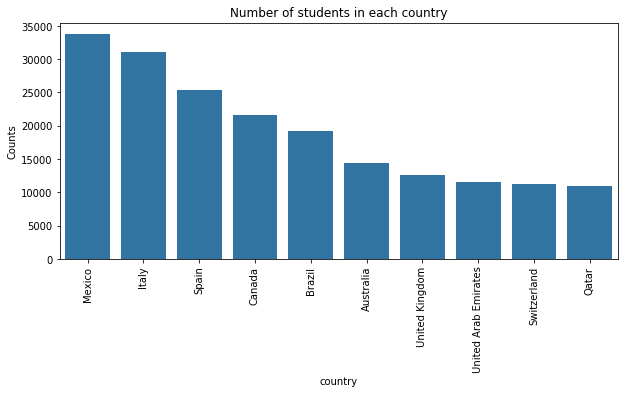

In [111]:
plt.figure(figsize = [10, 20])

plt.subplot(4, 1, 1)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'country', color = base_color, order=df['country'].value_counts().index[:10])
plt.title('Number of students in each country')
plt.xticks(rotation='vertical');
plt.ylabel('Counts');

Mexico contains the most student who participated in the survey. Followed by Italy, Spain, Canada, and Brazil.

In [112]:
def histogram (data, x, bins, xlabel, ylabel, title):
    plt.hist(data = data, x = x, bins = bins)
    plt.xlabel(xlabel);
    plt.ylabel(ylabel)
    plt.title(title);

### Age distribution across students

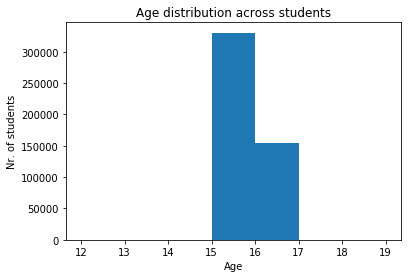

In [113]:
bin_edges = np.arange(12, 20, 1)
plt.hist(data = df, x = 'age', bins = bin_edges)

plt.xlabel('Age');
plt.ylabel('Nr. of students')
plt.title("Age distribution across students");

Age range is between 15 and 17.

### Scores distribution across students

In [114]:
def histogram (x, score):
    bins = np.arange(0, 1000 + 1, 100)
    plt.hist(x = x, bins = bins, ec = 'black', alpha = 0.85)
    plt.xlabel("{} Score".format(score))
    plt.ylabel("Number of Students")
    plt.title("{} Score distribution across students".format(score));

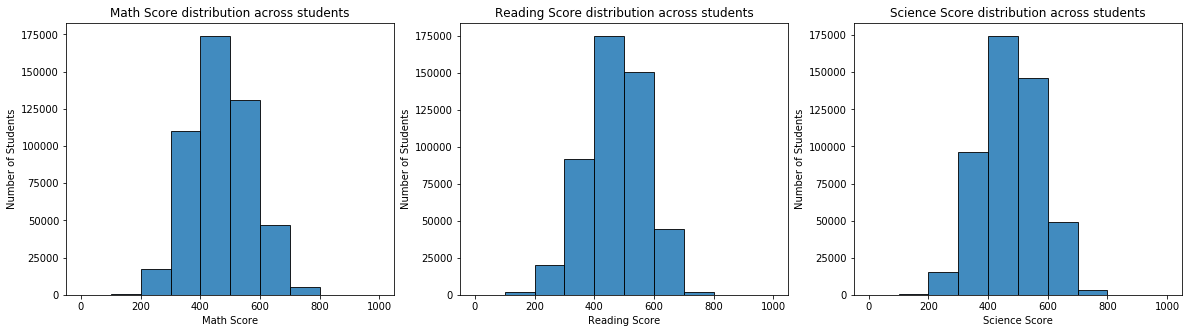

In [115]:
# univariate plots of math, reading, and science scores
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1) # 1 row, 3 cols, subplot 1 
histogram (df.math_score.values, 'Math')

plt.subplot(1, 3, 2) # 1 row, 3 cols, subplot 1 
histogram (df.reading_score.values, 'Reading')

plt.subplot(1, 3, 3) # 1 row, 3 cols, subplot 1 
histogram (df.science_score.values, 'Science')

The performance distribution of Math Score, Reading Score and Science Score is normal. Therefore we can conclude that the PISA test has been conducted in a proper manner. Most students scored between 400 and 500 points.

### Group work ratio across students

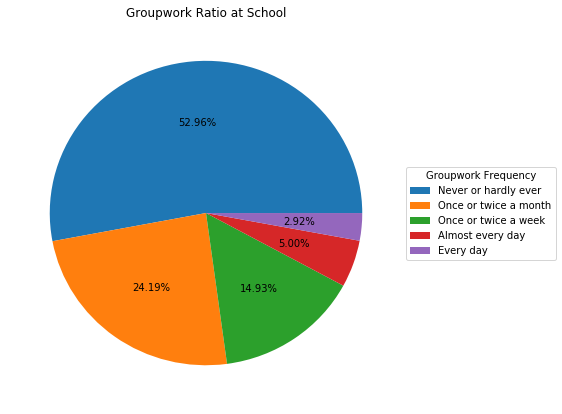

In [116]:
data = df.school_groupwork.value_counts() / df.school_groupwork.value_counts().sum()
labels = df.school_groupwork.value_counts().keys()
plt.figure(figsize = [7, 7])
wedges, texts, autotexts = plt.pie(data, autopct='%1.2f%%')
plt.legend(wedges, labels, title="Groupwork Frequency", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Groupwork Ratio at School');

More than half of the students do not have group work at school. Students sometimes have a couple of group work every month. The minority of the students have group work a couple of times a week.

### Students Internet Usage outside of School

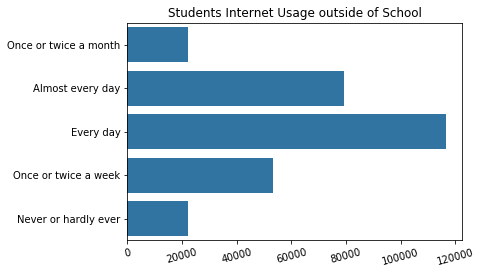

In [117]:
sb.countplot(data=df, y='outofschool_internet', color=sb.color_palette()[0])
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('')
plt.title('Students Internet Usage outside of School');

The majority of the students use the internet every day or almost every day outside of school.

### Family background distribution

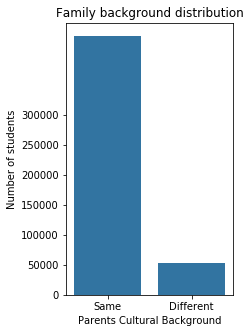

In [118]:
plt.figure(figsize=[3, 5]);
sb.countplot(x = 'cultural_background', data = df, color = sb.color_palette()[0]);

y_ticks = np.arange(0, 300000 + 1, 50000)
plt.yticks(y_ticks, y_ticks);
plt.xlabel("Parents Cultural Background");
plt.ylabel("Number of students");
plt.title('Family background distribution');

There are way more students having a homogeneous family background than having a heterogeneous family background in the PISA study. This might be a misleading factor in the further analysis.

<a id="bi"></a>
## Bivariate Exploration


### Difference in scores between male and female students

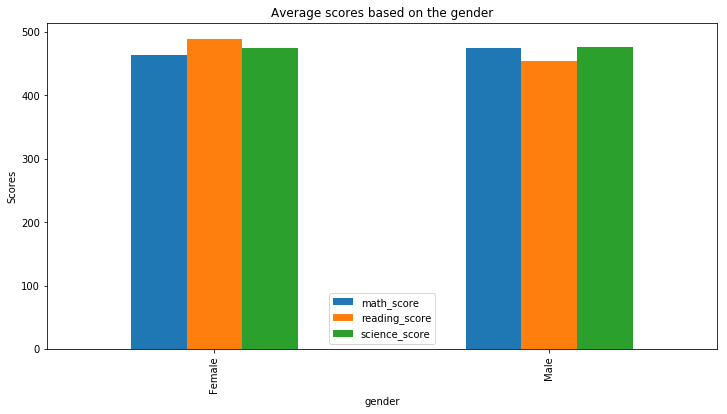

In [119]:
res = df.groupby(['gender']).mean()[['math_score', 'reading_score', 'science_score']]
ax = res.plot.bar(figsize=(12,6));
plt.ylabel('Scores')
plt.title('Average scores based on the gender');

Gender does not seem to play a significant role in student performance. Though something interesting to observe is that male participants scored higher on average on Math and Science, whereas female participants scored higher on Reading.

### Number of parents effect on the student's score

In [120]:
parent_number_group = df.groupby('parent_numbers').mean()
parent_number_group[['math_score', 'reading_score', 'science_score', 'overall_score']]

,math_score,reading_score,science_score,overall_score
parent_numbers,,,,
1,464.631972,469.752103,472.511095,468.965056
2,482.533873,483.598848,487.756648,484.629790
3,401.440157,407.180749,411.245693,406.622200


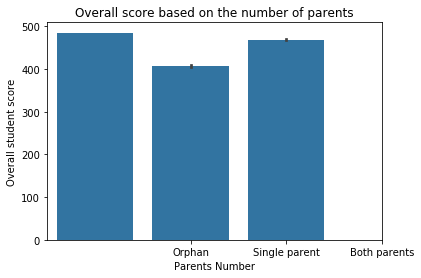

In [121]:
sb.barplot(data=df, x="parent_numbers", y="overall_score", color=sb.color_palette()[0])
plt.xticks([1, 2, 3], ['Orphan', 'Single parent', 'Both parents'])
plt.xlabel('Parents Number')
plt.ylabel('Overall student score')
plt.title('Overall score based on the number of parents');

If the student has a single parent then the performance of the student is notably decreased. Students have a higher score if they live without or with both parents.

## Scores distributions by country

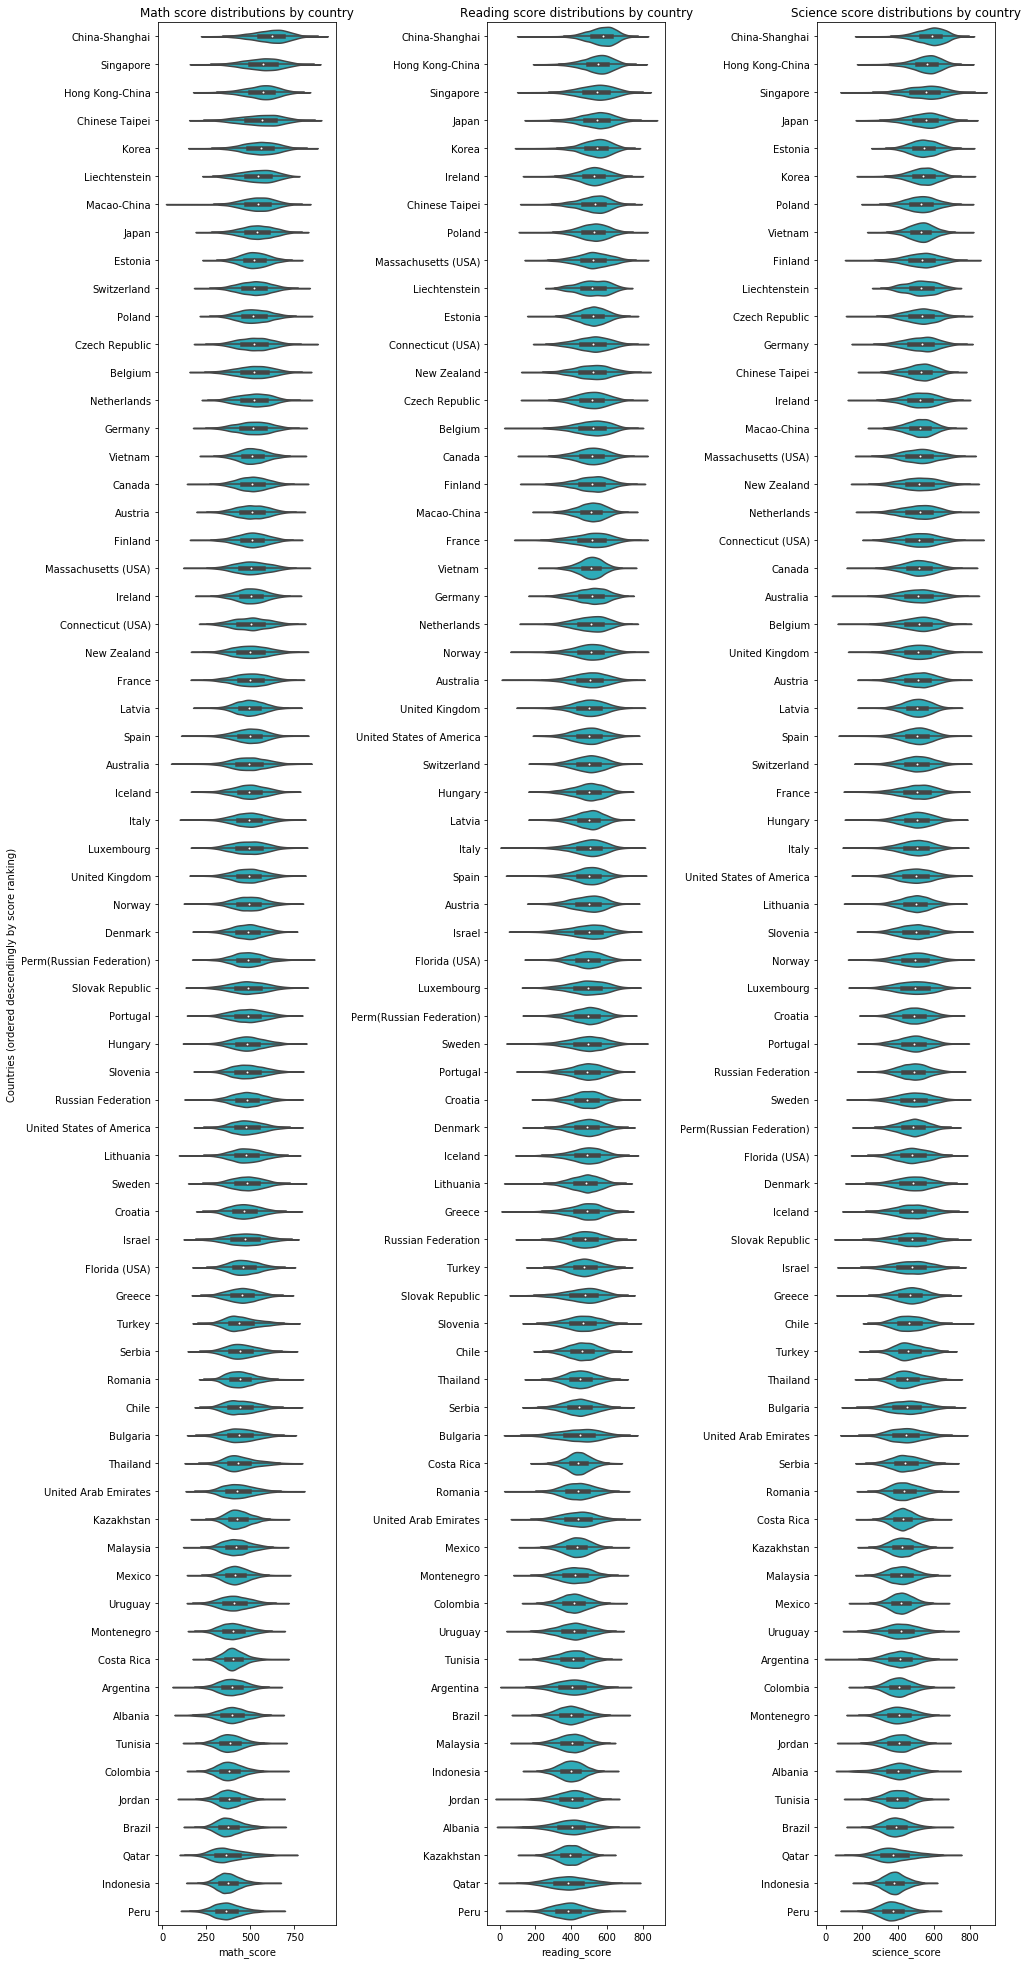

In [122]:
plt.figure(figsize = [15, 35])
plt.subplots_adjust(wspace = 0.85)

math_score_country_order = df.groupby('country')['math_score'].mean().sort_values(ascending = False).index
reading_score_country_order = df.groupby('country')['reading_score'].mean().sort_values(ascending = False).index
science_score_country_order = df.groupby('country')['science_score'].mean().sort_values(ascending = False).index

plt.subplot(1, 3, 1)
sb.violinplot(x = df['math_score'], y = df['country'], order = math_score_country_order, color = sb.color_palette()[9]);
plt.ylabel('Countries (ordered descendingly by score ranking)')
plt.title('Math score distributions by country');

plt.subplot(1, 3, 2)
sb.violinplot(x = df['reading_score'], y = df['country'], order = reading_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Reading score distributions by country');

plt.subplot(1, 3, 3)
sb.violinplot(x = df['science_score'], y = df['country'], order = science_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Science score distributions by country');

The country of origin seems to make a difference in student performance, as the best performing countries in Math, Reading and Science score on average highest throughout all three categories. Outstanding results are showing Hong Kong- China, as it is on the first place for all 3 categories and Estonia, as it is on the 2nd place for Math and Science and on the 3rd for Reading. Still we may also say that the difference between the participating countries is not significantly different.

### Time spent studying and time spent using the PC

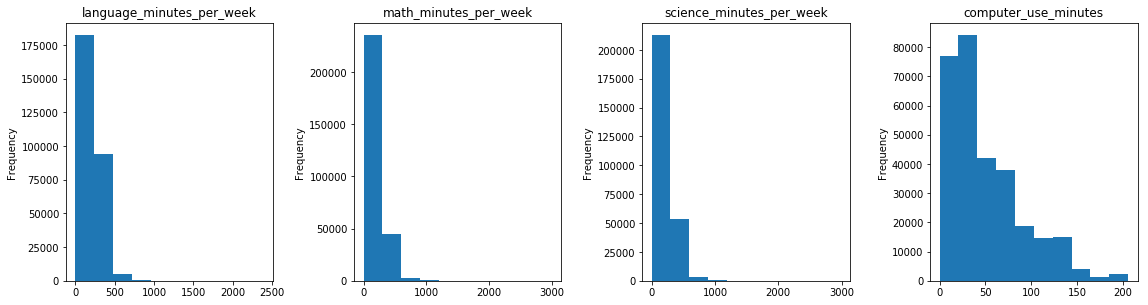

In [123]:
# plotting the some of the variables that might affect the pv scores
main_factors = ['language_minutes_per_week','math_minutes_per_week','science_minutes_per_week', 'computer_use_minutes']

fig = plt.figure()
fig.set_size_inches([20,20])
for c,num in zip(main_factors, np.arange(1,5)):
    ax = fig.add_subplot(5,5,num)
    df[c].plot(kind="hist", title=c, ax=ax)
plt.tight_layout()
plt.show()

Math and science learning time seems very closely related, while for reading languages, students seem to spent more time compared to math and science. While time spent using the computer seems has more wider variations, could it have an effect on the scores ?

<a id="multi"></a>
## Multivariate Exploration

### Scores Correlation

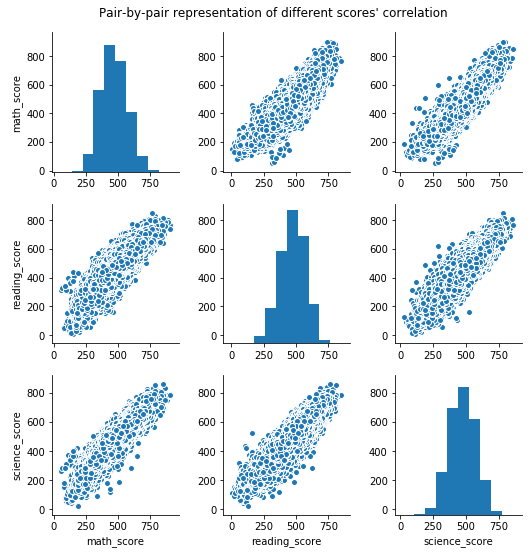

In [124]:
grid = sb.pairplot(data = df, vars=["math_score", "reading_score", "science_score"]);
grid.fig.suptitle("Pair-by-pair representation of different scores' correlation", y = 1.02);

There is a relationship between all the performance categories, which makes us think that a student that is performing well in one category will also perform well in another category. They are therefore interdependent.

<a id="ccl"></a>
## Conclusions

The student performance in the investigated data set seems to be influenced by location, gender and family background. As we discovered a relationship between Math, Reading and Science scores, such as a sample difference of students with a heterogeneous and a homogeneous family background, the results would need further investigation though.

In [125]:
# store the clean dataframe into a new csv file
df.to_csv('pisa_clean.csv')